# Adam Ahtesham

## Research question/interests

Briefly describe your research question or interests here.

Analyzing the impact that assets of a company has on revenues and profits

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "../data/raw/Fortune 1000 Companies by Revenue.csv"
df = pd.read_csv(url)

In [ ]:
df.info()
df.head()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   rank                    1000 non-null   object
 1   name                    1000 non-null   object
 2   revenues                1000 non-null   object
 3   revenue_percent_change  1000 non-null   object
 4   profits                 1000 non-null   object
 5   profits_percent_change  1000 non-null   object
 6   assets                  1000 non-null   object
 7   market_value            1000 non-null   object
 8   change_in_rank          1000 non-null   object
 9   employees               1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


,count,unique,top,freq
rank,1000,997,466,2
name,1000,1000,Walmart,1
revenues,1000,993,"$7,156",2
revenue_percent_change,1000,556,-,8
profits,1000,965,-,3
profits_percent_change,1000,641,-,273
assets,1000,997,"$13,223",2
market_value,1000,956,-,45
change_in_rank,1000,276,-,80
employees,1000,763,"14,000",8


In [ ]:
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(url)
df['revenues'] = df['revenues'].str.replace(',', '').str.replace('$', '').astype(float)
df['profits'] = df['profits'].replace('-', np.nan)
df['profits'] = df['profits'].str.replace('(', '').str.replace(')', '')
df['profits'] = df['profits'].str.replace(',', '').str.replace('$', '').astype(float)
df['assets'] = df['assets'].str.replace(',', '').str.replace('$', '').astype(float)
df['market_value'] = df['market_value'].replace('-', np.nan)
df['market_value'] = df['market_value'].str.replace(',', '').str.replace('$', '').astype(float)
df['employees'] = df['employees'].replace('-', np.nan)
df['employees'] = df['employees'].str.replace(',', '').astype(float)
df['revenue_percent_change'] = df['revenue_percent_change'].replace('-', np.nan)
df['revenue_percent_change'] = df['revenue_percent_change'].str.replace('%', '').astype(float)
df['profits_percent_change'] = df['profits_percent_change'].replace('-', np.nan)
df['profits_percent_change'] = df['profits_percent_change'].str.replace('%', '').astype(float)
df['change_in_rank'] = df['change_in_rank'].replace('-', np.nan)

df = df.dropna(subset=['revenues', 'revenue_percent_change', 'profits','profits_percent_change', 'assets', 'market_value', 'employees'])
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0
...,...,...,...,...,...,...,...,...,...,...
991,992,Beazer Homes USA,2140.3,0.6,122.0,133.6,2078.8,478.8,-61,1052.0
992,993,Chemed,2139.3,2.9,268.6,-15.9,1342.7,7592.5,-49,14137.0
995,996,Vizio Holding,2124.0,4.0,39.4,-138.4,935.8,1705.1,NaN,800.0
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,NaN,4800.0


In [ ]:
import project_functions3
df =  project_functions3.load_and_process(url)
df.describe()

,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,employees,revenue_over_profit,market_over_asset
count,688.000000,688.000000,688.000000,688.000000,6.880000e+02,6.880000e+02,6.880000e+02,688.000000,688.000000
mean,19431.373401,20.961047,2626.288081,338.974855,7.004708e+04,5.477251e+04,4.094729e+04,16.723604,1.801162
std,44721.783523,34.522314,7436.514037,2831.654260,3.110447e+05,1.869759e+05,1.230879e+05,31.039718,2.145690
min,2112.800000,-39.900000,12.500000,-989.100000,4.138000e+02,3.719000e+02,3.470000e+02,0.688311,0.000169
25%,3732.375000,6.375000,367.775000,10.175000,4.936175e+03,5.379650e+03,7.207250e+03,5.522112,0.583136
50%,6811.800000,14.850000,783.000000,41.250000,1.252010e+04,1.578655e+04,1.411850e+04,9.278985,1.144177
75%,15760.250000,25.625000,1916.075000,116.875000,3.465050e+04,4.094462e+04,3.100000e+04,16.373610,2.120141
max,572754.000000,513.700000,94680.000000,49978.900000,4.229166e+06,2.849538e+06,2.300000e+06,425.196744,18.910758


# Analzying the impact of profits and revenus on assets 

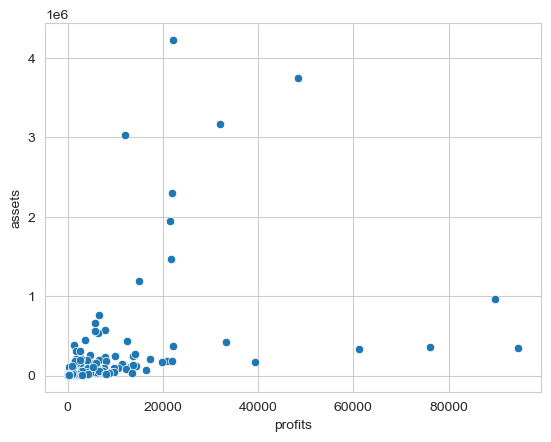

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, y = 'assets', x = 'profits').figure.savefig("../images/adam1.png")

# Reducing the max profits to 20000

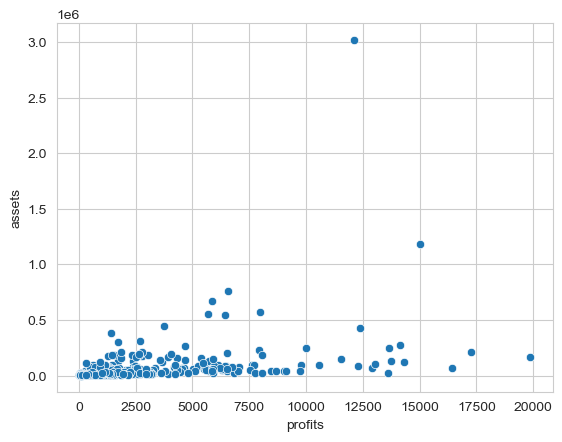

In [ ]:
df = df.drop(df['profits'].loc[(df['profits'] > 20000)].index)
sns.scatterplot(x = df['profits'], y=df['assets']).figure.savefig("../images/adam2.png") 

# Reducing max profits to 10000

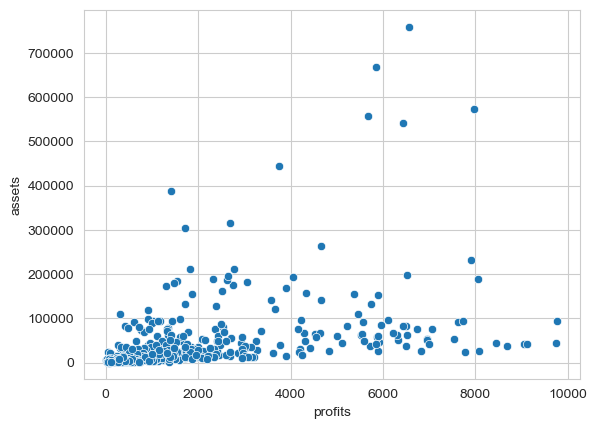

In [ ]:
df = df.drop(df['profits'].loc[(df['profits'] > 10000)].index)
sns.scatterplot(x = df['profits'], y=df['assets']).figure.savefig("../images/adam3.png")

# Reducing max profits to 4000

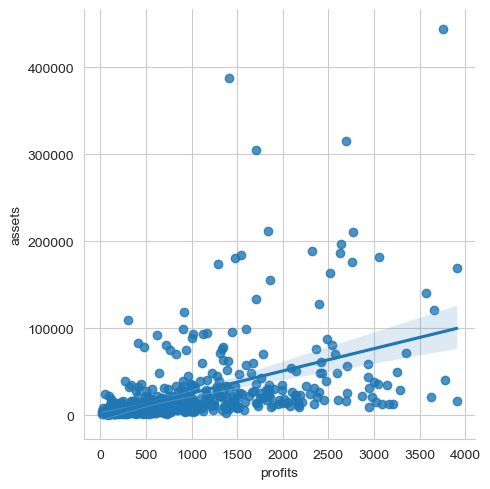

In [ ]:
df = df.drop(df['profits'].loc[(df['profits'] > 4000)].index)
sns.lmplot(data = df,x = 'profits', y='assets').figure.savefig("../images/adam4.png") 

The scatterplots demonstrate the relationship that assets has on profits. A scatterplot was selected to assist us in visualizing the answer to this research question as the invidual data points are plotted and a generic trend in the data can be observed as a result. We can see from the graphs that generally as profits increase, the assets of a company will also increase. It is intereasting to see how the comparision holds a linear relationship between profits and assets, it can then be concluded that profits have a positive impact on the company's assets. This outcome was expected as we were aware that a corporation grows when it generates money because its net assets have grown. Even if a portion of the income is later paid out as a dividend to shareholders, the firm has expanded due to its own activities.